In [80]:
import numpy as np
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/train_coaxnn_paper_text.csv")


In [5]:
df

,text
0,Contents lists available at ScienceDirect\n\nJ...
1,Efficient neural networks\nModel approximation...
2,"propose a novel model optimization framework, ..."
3,up to 1.53× speedup while reducing energy by u...
4,to the limited resources.\n\nMany efforts have...
...,...
141,"Reference [47]: Y. Chen, X. Wen, Y. Zhang, Q. ..."
142,"Reference [48]: Y. Chen, X. Wen, Y. Zhang, W. ..."
143,"Reference [49]: X. Chen, H. Ma, J. Wan, B. Li,..."
144,"Reference [50]: G. Hinton, O. Vinyals, J. Dean..."


In [6]:
train = Dataset.from_pandas(df)

In [7]:
train

Dataset({
    features: ['text'],
    num_rows: 146
})

In [8]:
len(train[10]['text'])

1006

In [9]:
4212 * 912

3841344

In [10]:
# Load the tokenizer
model_id = "ilufy/meta-llama2-7b-coaxnn-paper-domain-tuned-merged-180"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"


/home/aribra/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

In [11]:
tokenizer

LlamaTokenizerFast(name_or_path='ilufy/meta-llama2-7b-coaxnn-paper-domain-tuned-merged-180', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [12]:
train[10]['text']

'motivation are introduced in Section 2. The details of our optimization\nframework are described in Section 3. The experimental evaluation\nis conducted in Section 4. A discussion is given in Section 5. The\nconclusion is presented in Section 6.\n\n2. Background and motivation\n\n2.1. Pruning-based approximation\n\nNeural network pruning, one of the most representative model com-\npression techniques, approximates the original neural network model\nby reducing redundant neurons or connections making less contribu-\ntion to model performance. Most previous works on pruning-based\napproximation can be roughly divided into two categories: unstructured\npruning and structured pruning.\n\nPrior works on weight pruning [4,5] achieve high non-structured\nsparsity of pruned models by removing single parameters in a fil-\nter. Guo et al. [4] and Hal et al. [5] used magnitude-based pruning\nmethods, which eliminate weights with the smallest magnitude. Guo\net al. [4] proposed dynamic network su

In [13]:
tokenizer(train[10]['text'])

{'input_ids': [1, 17385, 362, 526, 9129, 297, 9779, 29871, 29906, 29889, 450, 4902, 310, 1749, 13883, 13, 4468, 526, 5439, 297, 9779, 29871, 29941, 29889, 450, 17986, 17983, 13, 275, 18043, 297, 9779, 29871, 29946, 29889, 319, 10679, 338, 2183, 297, 9779, 29871, 29945, 29889, 450, 13, 535, 10085, 338, 9132, 297, 9779, 29871, 29953, 29889, 13, 13, 29906, 29889, 16585, 322, 17385, 362, 13, 13, 29906, 29889, 29896, 29889, 1588, 27964, 29899, 6707, 16845, 13, 13, 8139, 3631, 3564, 544, 27964, 29892, 697, 310, 278, 1556, 21097, 1904, 419, 29899, 13, 2590, 13698, 29892, 6881, 1078, 278, 2441, 19677, 3564, 1904, 13, 1609, 27668, 28005, 26808, 787, 470, 12368, 3907, 3109, 27895, 29899, 13, 12757, 304, 1904, 4180, 29889, 7849, 3517, 1736, 373, 544, 27964, 29899, 6707, 13, 9961, 2657, 362, 508, 367, 20928, 13931, 964, 1023, 13997, 29901, 443, 4984, 2955, 13, 558, 27964, 322, 2281, 2955, 544, 27964, 29889, 13, 13, 29925, 13479, 1736, 373, 7688, 544, 27964, 518, 29946, 29892, 29945, 29962, 6176, 1

In [14]:
def tokenize(batch):
    batch['input_ids'] = [tokenizer(text)['input_ids'] for text in batch["text"]]
    return batch

dset_tokenized = train.map(tokenize, batched=True)
flattened_tokens = np.concatenate(dset_tokenized['input_ids'])
fdist = FreqDist(flattened_tokens)


Map:   0%|          | 0/146 [00:00<?, ? examples/s]

In [15]:
fdist

FreqDist({13: 3502, 29889: 1914, 29892: 1167, 160: 966, 29896: 937, 278: 935, 243: 895, 29900: 870, 29871: 781, 148: 772, ...})

### Number of tokens

In [16]:
flattened_tokens.shape

(37917,)

In [17]:
train[0]

{'text': 'Contents lists available at ScienceDirect\n\nJournal of Systems Architecture\n\njournal homepage: www.elsevier.com/locate/sysarc\n\nCoAxNN: Optimizing on-device deep learning with conditional approximate\nneural networks\nGuangli Li a,b,1, Xiu Ma c,d,1, Qiuchu Yu a,b, Lei Liu c,d, Huaxiao Liu c,d, Xueying Wang a,b,∗\na State Key Lab of Processors, Institute of Computing Technology, Chinese Academy of Sciences, Beijing, China\nb University of Chinese Academy of Sciences, Beijing, China\nc College of Computer Science and Technology, Jilin University, Changchun, China\nd MOE Key Laboratory of Symbolic Computation and Knowledge Engineering, Jilin University, Changchun, China\n\nA R T I C L E I N F O\n\nA B S T R A C T\n\nKeywords:\nOn-device deep learning\nEfficient neural networks\nModel approximation and optimization\n\nWhile deep neural networks have achieved superior performance in a variety of intelligent applications, the\nincreasing computational complexity makes them diff

In [18]:
len(tokenizer(train[0]['text'])['input_ids'])

282

In [19]:
# dset_tokenized[0]['text']['input_ids']

In [20]:
tokens_dist = np.array(list(fdist.items()))

In [21]:
tokens_dist.shape

(2493, 2)

In [22]:
fdist[13]

3502

In [23]:
tokens_dist[:10]

array([[    1,   146],
       [ 2866,     1],
       [ 1237,     1],
       [ 8857,     1],
       [ 3625,    13],
       [  472,    49],
       [ 9327,     4],
       [17392,     1],
       [   13,  3502],
       [29967,    30]])

In [25]:
sample_sorted = tokens_dist[:10].copy()
sample_sorted = sample_sorted[sample_sorted[:, 0].argsort()]
sample_sorted

array([[    1,   146],
       [   13,  3502],
       [  472,    49],
       [ 1237,     1],
       [ 2866,     1],
       [ 3625,    13],
       [ 8857,     1],
       [ 9327,     4],
       [17392,     1],
       [29967,    30]])

## Sort tokens

In [26]:
tokens_dist = tokens_dist[tokens_dist[:, 1].argsort()]

In [27]:
tokens_dist[-10:]

array([[  148,   772],
       [29871,   781],
       [29900,   870],
       [  243,   895],
       [  278,   935],
       [29896,   937],
       [  160,   966],
       [29892,  1167],
       [29889,  1914],
       [   13,  3502]])

In [28]:
tokenizer.batch_decode(tokens_dist[-20:, 0])

['and',
 '9',
 '5',
 '7',
 '4',
 '8',
 'of',
 '3',
 '-',
 '2',
 '�',
 '',
 '0',
 '�',
 'the',
 '1',
 '�',
 ',',
 '.',
 '\n']

In [29]:
flattened_tokens.shape

(37917,)

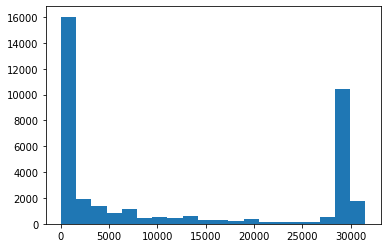

In [30]:
plt.hist(flattened_tokens, 20);

In [31]:
tokenizer.batch_decode(tokens_dist[-20:, 0])

['and',
 '9',
 '5',
 '7',
 '4',
 '8',
 'of',
 '3',
 '-',
 '2',
 '�',
 '',
 '0',
 '�',
 'the',
 '1',
 '�',
 ',',
 '.',
 '\n']

In [44]:
tokens_count

[170,
 172,
 178,
 190,
 194,
 197,
 203,
 229,
 253,
 316,
 335,
 351,
 351,
 388,
 392,
 413,
 474,
 565,
 717,
 732,
 772,
 781,
 870,
 895,
 935,
 937,
 966,
 1167,
 1914,
 3502]

array([  5.,   5.,   5.,   6.,   6.,   6.,   6.,   7.,   8.,  10.,  10.,
        11.,  11.,  12.,  12.,  13.,  15.,  18.,  23.,  24.,  25.,  25.,
        28.,  29.,  30.,  30.,  31.,  38.,  63., 116.])

0 170
1 172
2 178
3 190
4 194
5 197
6 203
7 229
8 253
9 316
10 335
11 351
12 351
13 388
14 392
15 413
16 474
17 565
18 717
19 732
20 772
21 781
22 870
23 895
24 935
25 937
26 966
27 1167
28 1914
29 3502


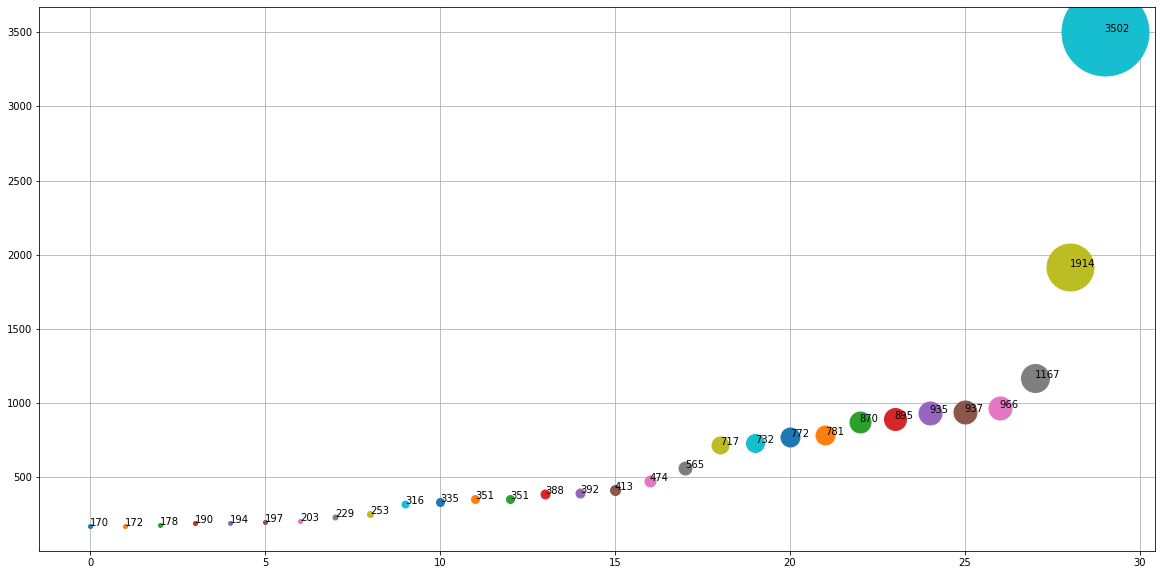

In [78]:
LIMIT = 30
tokens_str = tokenizer.batch_decode(tokens_dist[-LIMIT:, 0])
tokens_str = str(tokens_str)[1:-2].replace("'", "").split(', ')
tokens_count = list(tokens_dist[-LIMIT:, 1])

fig = plt.figure(figsize = (20, 10))
# plt.bar(tokens_str, tokens_count, color ='maroon', width = 0.7, );
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=13)

msizes = (np.array(tokens_count) - 10) / (60 - 20) // 1

for ix, tc in enumerate(tokens_count):
    print(ix, tc)
    plt.plot(ix, tc, 'o', ms=msizes[ix])
    plt.text(ix, tc, str(tc))

plt.grid()


In [51]:
str(tokens_str)

"['model', 'is', 'E', '[', 'for', 'A', 'Net', 'to', '(', '6', 'and', '9', '5', '7', '4', '8', 'of', '3', '-', '2', '�', '', '0', '�', 'the', '1', '�', ',', '.', '\\\\n']"

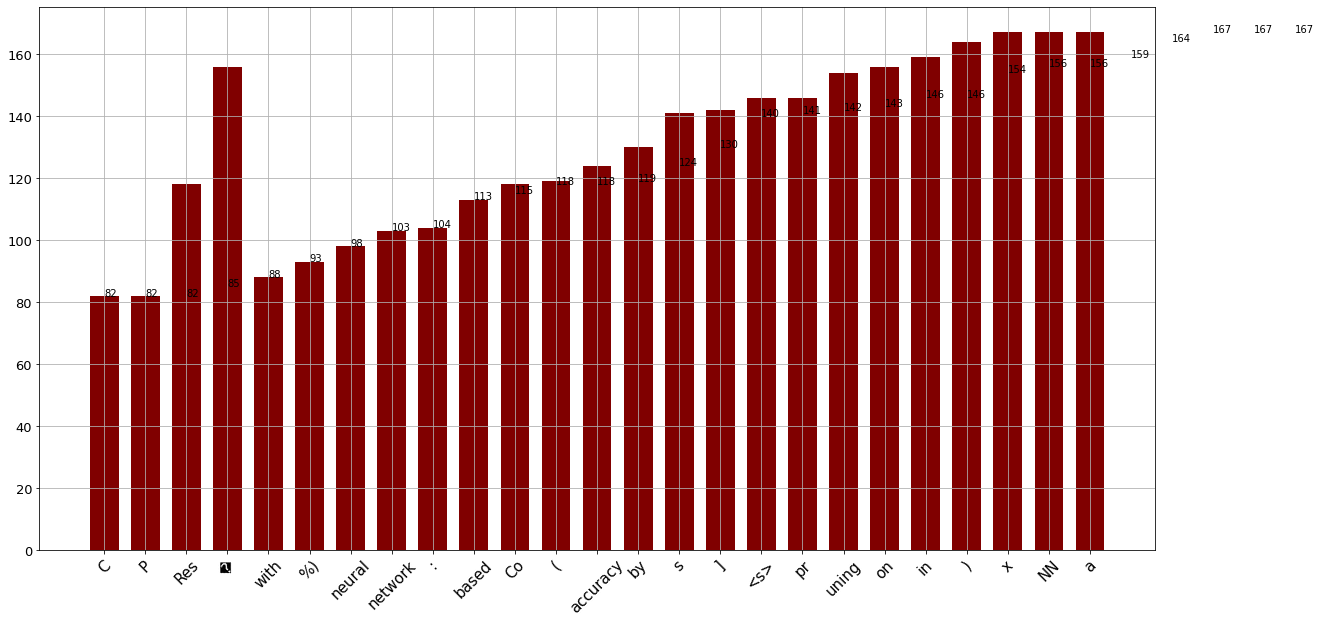

In [52]:
LIMIT = 30
tokens_str = [str(s) for s in tokenizer.batch_decode(tokens_dist[-60:-LIMIT:, 0])]
tokens_count = list(tokens_dist[-60:-LIMIT:, 1])

fig = plt.figure(figsize = (20, 10))
plt.bar(tokens_str, tokens_count, color ='maroon', width = 0.7, );
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

for ix, tc in enumerate(tokens_count):
    plt.text(ix, tc, str(tc))

plt.xticks(rotation=45)

plt.grid()


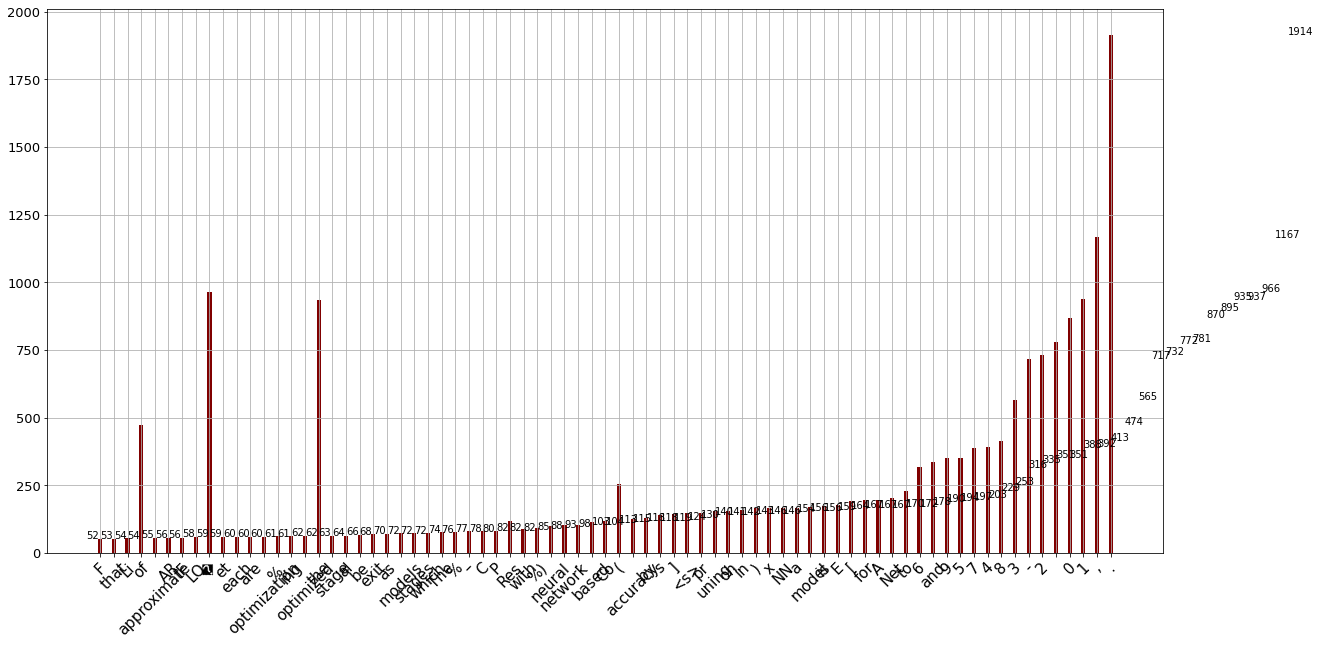

In [53]:
START = -90
END = -1
tokens_str = [str(s) for s in tokenizer.batch_decode(tokens_dist[START:END, 0])]
tokens_count = list(tokens_dist[START:END, 1])

fig = plt.figure(figsize = (20, 10))
plt.bar(tokens_str, tokens_count, color ='maroon', width = 0.3, );
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

for ix, tc in enumerate(tokens_count):
    plt.text(ix-1, tc, str(tc))

plt.xticks(rotation=45)

plt.grid()


In [436]:
list(tokens_dist[-20:, 1])

[3328,
 3800,
 3940,
 3944,
 4004,
 4212,
 4248,
 5060,
 7524,
 7744,
 8316,
 9560,
 12604,
 13288,
 18008,
 27776,
 29460,
 35504,
 50968,
 56532]